# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/NLP project/processed_downsampled_data.csv', index=False)

def to_three(x):
  if x <= 2: return 0      # 1–2 stars → class 0
  if x == 3: return 1      # 3 stars   → class 1
  return 2                 # 4–5 stars → class 2

df['Score'] = df['Score'].map(to_three)

train_df, test_df = train_test_split(
        df,
        test_size=0.1,
        stratify=df['Score'],
        random_state=42
    )

# Save to CSV
train_df.to_csv('/content/drive/MyDrive/NLP project/train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/NLP project/test_data.csv', index=False)

# Print class distributions
print("Train set class distribution:")
print(train_df['Score'].value_counts(normalize=True))

print("\nTest set class distribution:")
print(test_df['Score'].value_counts(normalize=True))

# Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/NLP project/processed_downsampled_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/NLP project/new_test_data.csv')
train_data = pd.read_csv('/content/drive/MyDrive/NLP project/new_train_data.csv')

In [4]:
test_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,char_count,word_count,word_density,punctuation_count,predicted_sentiment,predicted_class,predicted_sentiment_numerical,predicted_sentiment_num,predicted_numeric,ground_truth
0,298057,B003AZ2ECY,A1IKJDANTE0OE0,gluten-free mom,1,3,1,1345766400,Not Gluten-Free,item listed glutenfree products absolutely glu...,...,149,20,7.095238,0,positive,2,2,2,2,negative
1,37903,B000F6SNPS,A12MVVDKHK1QA0,Jon,4,8,1,1280188800,Artificial Flavor!,bought tea find third ingredient artificial fl...,...,481,60,7.885246,0,neutral,1,1,1,1,negative
2,76898,B0045TVL6E,A1I71HXN9ZWKUB,JN,0,0,4,1348704000,Taste Great but Pricey; Great Gluten Free Option,buffalo jerky bites taste great expensive espe...,...,337,48,6.877551,0,positive,2,2,2,2,positive
3,86693,B001OC4I2E,A3OF8BUR3U49G1,Shane S,2,2,2,1307750400,Not Ideal for the Task,playing sports many years thought lace cover w...,...,446,67,6.558824,0,positive,2,2,2,2,negative
4,46041,B001EO5QZK,A1S7MC961R4WE4,Ash,2,5,3,1167868800,Not Strong enough,tea ok like tea strong dash milk best,...,37,8,4.111111,0,positive,2,2,2,2,neutral


# Statiscal Training

In [5]:
# 1. Uninstall both numpy and gensim
!pip uninstall -y numpy gensim

# 2. Reinstall compatible versions
!pip install numpy==1.24.4 gensim==4.3.2


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 69.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0

In [9]:
# Downgrade scipy to a version compatible with gensim
!pip install scipy==1.10.1 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Tokenize
train_sentences = train_data['Text'].apply(simple_preprocess).tolist()
test_sentences  = test_data ['Text'].apply(simple_preprocess).tolist()

# 2. Train Word2Vec on TRAIN only
w2v_model = Word2Vec(
    sentences=train_sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    epochs=10
)

# 3. Average-vector helper
def document_vector(tokens, model):
    vecs = [model.wv[t] for t in tokens if t in model.wv]
    # CORRECT: use np.zeros, not numpy.char.zeros
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

# 4. Build feature matrices
X_train = np.vstack([document_vector(s, w2v_model) for s in train_sentences])
X_test  = np.vstack([document_vector(s, w2v_model) for s in test_sentences ])

# 5. Encode your three string labels → integers 0,1,2
le = LabelEncoder()
y_train = le.fit_transform(train_data['ground_truth'])
y_test  = le.transform( test_data ['ground_truth'])

# 6. Fit a multinomial Logistic Regression
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
clf.fit(X_train, y_train)

# 7. Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6
              precision    recall  f1-score   support

    negative       0.59      0.78      0.67       400
     neutral       0.46      0.09      0.15       200
    positive       0.62      0.68      0.65       400

    accuracy                           0.60      1000
   macro avg       0.56      0.52      0.49      1000
weighted avg       0.58      0.60      0.56      1000



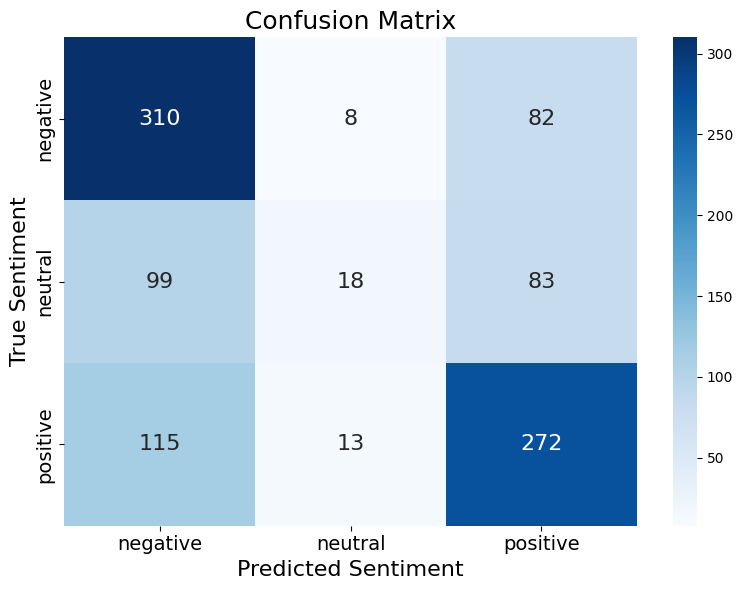

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

# 2. Plot confusion matrix with bigger fonts
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 16})  # <- Bigger font for numbers

# Customize fonts
plt.xlabel('Predicted Sentiment', fontsize=16)
plt.ylabel('True Sentiment', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)

# Customize tick label fonts
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [7]:
import kagglehub
import os

# Download latest version
dataset_dir = kagglehub.dataset_download("suraj520/googlenews-vectors-negative300bingz-gz-format")

for filename in os.listdir(dataset_dir):
    if filename.endswith(".bin.gz") or filename.endswith(".bin"):
        file_path = os.path.join(dataset_dir, filename)
        break  # Stop after finding the first .bin.gz or .bin file

print("Path to dataset file:", file_path)

Path to dataset file: /root/.cache/kagglehub/datasets/suraj520/googlenews-vectors-negative300bingz-gz-format/versions/1/GoogleNews-vectors-negative300.bin


In [8]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Tokenize texts
train_sentences = train_data['Text'].apply(simple_preprocess).tolist()
test_sentences  = test_data ['Text'].apply(simple_preprocess).tolist()

# 2. Load the Google News pre-trained vectors
#    Update the path to wherever you placed the .bin file
w2v_model = KeyedVectors.load_word2vec_format(
    file_path,
    binary=True
)

# 3. Helper: average the pretrained vectors for each document
def document_vector(tokens, model):
    vecs = [model[t] for t in tokens if t in model]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

# 4. Build feature matrices by averaging embeddings
X_train = np.vstack([document_vector(s, w2v_model) for s in train_sentences])
X_test  = np.vstack([document_vector(s, w2v_model) for s in test_sentences ])

# 5. Encode your three sentiment labels → integers 0/1/2
le = LabelEncoder()
y_train = le.fit_transform(train_data['ground_truth'])  # e.g. ['negative','neutral','positive']
y_test  = le.transform( test_data ['ground_truth'])

# 6. Train a multinomial logistic regression
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',   # optional, helps if your classes are imbalanced
    random_state=42
)
clf.fit(X_train, y_train)

# 7. Evaluate on your test set
y_pred = clf.predict(X_test)
print("Test accuracy:  {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification report:\n", classification_report(
    y_test, y_pred, target_names=le.classes_, digits=4
))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test accuracy:  0.6030

Classification report:
               precision    recall  f1-score   support

    negative     0.7109    0.6700    0.6898       400
     neutral     0.3422    0.4500    0.3888       200
    positive     0.6806    0.6125    0.6447       400

    accuracy                         0.6030      1000
   macro avg     0.5779    0.5775    0.5744      1000
weighted avg     0.6250    0.6030    0.6116      1000



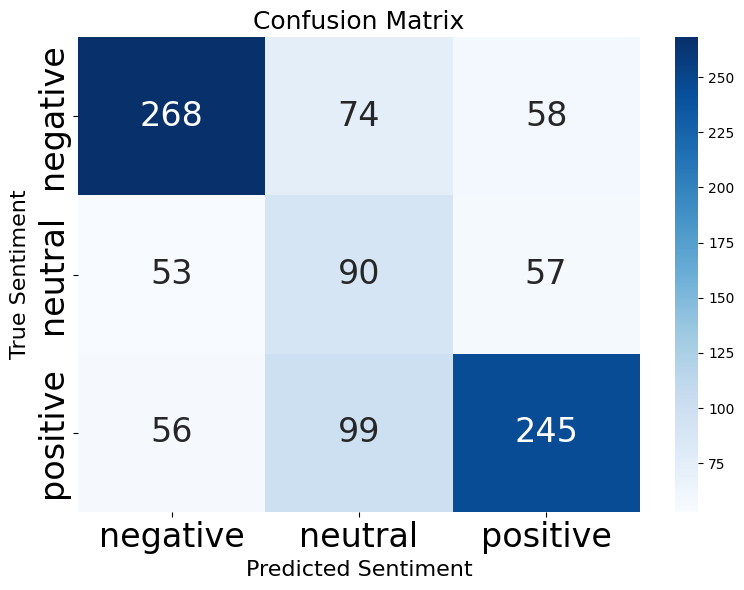

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

# 2. Plot confusion matrix with bigger fonts
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 24})  # <- Bigger font for numbers

# Customize fonts
plt.xlabel('Predicted Sentiment', fontsize=16)
plt.ylabel('True Sentiment', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)

# Customize tick label fonts
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.tight_layout()
plt.show()


# Neural Training

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# ── 2. Tokenize ──
train_tokens = train_data['Text'].apply(simple_preprocess).tolist()
test_tokens  = test_data['Text'].apply(simple_preprocess).tolist()

# ── 3. Load pre-trained Word2Vec ──
w2v_model = KeyedVectors.load_word2vec_format(
    file_path,
    binary=True
)

# ── 4. Average-vector representation ──
def vectorize(tokens, model):
    vecs = [model[t] for t in tokens if t in model]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_train = np.vstack([vectorize(tokens, w2v_model) for tokens in train_tokens])
X_test  = np.vstack([vectorize(tokens, w2v_model) for tokens in test_tokens])

# ── 5. Encode 3-class sentiment labels ──
le = LabelEncoder()
y_train = le.fit_transform(train_data['ground_truth'])
y_test  = le.transform(test_data['ground_truth'])

# ── 6. PyTorch Dataset class ──
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = ReviewDataset(X_train, y_train)
test_ds  = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# ── 7. Define a simple MLP ──
class SentimentMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(SentimentMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = SentimentMLP(input_dim=300, hidden_dim=128, num_classes=3)

# ── 8. Train ──
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(10):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} loss: {loss.item():.4f}")

# ── 9. Evaluate ──
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        logits = model(X_batch)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

print("Test Accuracy:", accuracy_score(all_labels, all_preds))
print(classification_report(all_labels, all_preds, target_names=le.classes_))

Epoch 1 loss: 0.5941
Epoch 2 loss: 0.6374
Epoch 3 loss: 1.2586
Epoch 4 loss: 0.9822
Epoch 5 loss: 0.8050
Epoch 6 loss: 0.6190
Epoch 7 loss: 0.5555
Epoch 8 loss: 0.5817
Epoch 9 loss: 0.6281
Epoch 10 loss: 1.0378
Test Accuracy: 0.643
              precision    recall  f1-score   support

    negative       0.70      0.71      0.71       400
     neutral       0.49      0.17      0.25       200
    positive       0.62      0.81      0.70       400

    accuracy                           0.64      1000
   macro avg       0.60      0.56      0.55      1000
weighted avg       0.63      0.64      0.61      1000



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# ── 2. Tokenize review texts ──
train_tokens = train_data['Text'].apply(simple_preprocess).tolist()
test_tokens  = test_data['Text'].apply(simple_preprocess).tolist()

# ── 3. Train Word2Vec on train tokens ──
w2v_model = Word2Vec(
    sentences=train_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    epochs=10
)

# ── 4. Average-vector representation ──
def vectorize(tokens, model):
    vecs = [model.wv[t] for t in tokens if t in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_train = np.vstack([vectorize(tokens, w2v_model) for tokens in train_tokens])
X_test  = np.vstack([vectorize(tokens, w2v_model) for tokens in test_tokens])

# ── 5. Label encode the 3-class sentiment ──
le = LabelEncoder()
y_train = le.fit_transform(train_data['ground_truth'])  # e.g. [0, 1, 2]
y_test  = le.transform(test_data['ground_truth'])

# ── 6. PyTorch dataset ──
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = ReviewDataset(X_train, y_train)
test_ds  = ReviewDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# ── 7. MLP model ──
class SentimentMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(SentimentMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = SentimentMLP(input_dim=100, hidden_dim=128, num_classes=3)

# ── 8. Loss & Optimizer ──
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ── 9. Training loop ──
for epoch in range(50):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} loss: {loss.item():.4f}")

# ── 10. Evaluation ──
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        logits = model(X_batch)
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

print("Test Accuracy:", accuracy_score(all_labels, all_preds))
print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=le.classes_))

Epoch 1 loss: 1.2899
Epoch 2 loss: 0.7021
Epoch 3 loss: 0.8461
Epoch 4 loss: 0.9365
Epoch 5 loss: 0.7386
Epoch 6 loss: 0.8197
Epoch 7 loss: 1.0897
Epoch 8 loss: 0.7055
Epoch 9 loss: 0.9553
Epoch 10 loss: 0.8012
Epoch 11 loss: 0.7089
Epoch 12 loss: 0.7241
Epoch 13 loss: 0.6258
Epoch 14 loss: 0.6404
Epoch 15 loss: 0.7619
Epoch 16 loss: 0.8509
Epoch 17 loss: 0.8713
Epoch 18 loss: 0.7825
Epoch 19 loss: 0.9111
Epoch 20 loss: 0.8626
Epoch 21 loss: 0.7892
Epoch 22 loss: 0.5975
Epoch 23 loss: 0.6040
Epoch 24 loss: 0.5891
Epoch 25 loss: 0.6327
Epoch 26 loss: 1.4511
Epoch 27 loss: 0.4608
Epoch 28 loss: 0.6848
Epoch 29 loss: 0.9203
Epoch 30 loss: 0.8092
Epoch 31 loss: 0.9753
Epoch 32 loss: 0.7253
Epoch 33 loss: 1.3173
Epoch 34 loss: 1.5140
Epoch 35 loss: 0.7933
Epoch 36 loss: 0.5836
Epoch 37 loss: 1.2657
Epoch 38 loss: 1.3543
Epoch 39 loss: 0.8381
Epoch 40 loss: 0.5661
Epoch 41 loss: 0.6358
Epoch 42 loss: 0.7351
Epoch 43 loss: 0.9836
Epoch 44 loss: 0.7832
Epoch 45 loss: 1.0664
Epoch 46 loss: 0.98

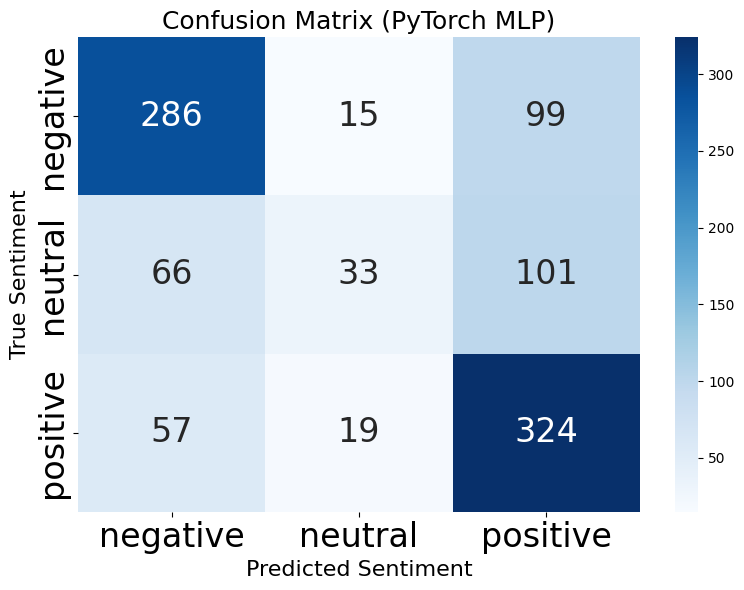

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
labels = le.classes_  # ['negative', 'neutral', 'positive']

# 2. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 24})  # Large font for matrix values

# 3. Customize labels and fonts
plt.xlabel('Predicted Sentiment', fontsize=16)
plt.ylabel('True Sentiment', fontsize=16)
plt.title('Confusion Matrix (PyTorch MLP)', fontsize=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.tight_layout()
plt.show()
